# 😃 Introduction
This is the first time I'm using Pytorch. I'm normally the Tensorflow guy but it seems there is a need to learn Pytorch as well so I'm going to try it with this notebook here.

But first we start with some EDA, the Pytorch part will come later. Stay tuned!

In [61]:
# Imports
import pandas as pd
import numpy as np
import os


import matplotlib.pyplot as plt
import seaborn as sns
import nltk

import torch

In [62]:
# Main GPU and path configs
print(f"Pytorch Version: {torch.__version__}")
print(f"Cuda Version: {torch.cuda_version}")


device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True
    print(f'Using {device} device for computation.')
else: 
    print("No GPU was detected. Model will run on cpu only.")


seed=42
torch.manual_seed(seed)
np.random.seed(seed)



iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE','')

MAIN_PATH = os.getcwd()
INPUT_DATA = 'feedback-prize-english-language-learning'

# change your local path here
if iskaggle:
    DATA_PATH = os.path.join(MAIN_PATH, '../input')
    PHRASES_PATH = os.path.join(DATA_PATH, INPUT_DATA)
else:
    DATA_PATH = os.path.join(MAIN_PATH, 'data')
    PHRASES_PATH = os.path.join(DATA_PATH,'input\\' + INPUT_DATA)

print(30 * '---')
print(f'Input files:')

for dirname, _, filenames in os.walk(PHRASES_PATH): 
    for filename in filenames:
        print(os.path.join(dirname, filename))


Pytorch Version: 1.12.1
Cuda Version: 11.6
Using cuda device for computation.
------------------------------------------------------------------------------------------
Input files:
f:\python-workspace\feedbackELL\data\input\feedback-prize-english-language-learning\sample_submission.csv
f:\python-workspace\feedbackELL\data\input\feedback-prize-english-language-learning\test.csv
f:\python-workspace\feedbackELL\data\input\feedback-prize-english-language-learning\train.csv


In [63]:
# Data path and file

CSV_FILE_TRAIN='train.csv'
CSV_FILE_TEST='test.csv'
CSV_FILE_SCOMF='sample_submission.csv'


def load_csv_data(path, csv_file):
    csv_path = os.path.join(path, csv_file)
    return pd.read_csv(csv_path)

def load_csv_data_manuel(path, csv_file):
    csv_path = os.path.join(path, csv_file)
    csv_file = open(csv_path, 'r')
    csv_data = csv_file.readlines()
    csv_file.close()
    return csv_data
    

train = load_csv_data(PHRASES_PATH, CSV_FILE_TRAIN)
test = load_csv_data(PHRASES_PATH, CSV_FILE_TEST)
sample_comp_file = load_csv_data(PHRASES_PATH, CSV_FILE_SCOMF)



print(f'Length of loaded trainset: {len(train)}')
print(f'Length of loaded testset: {len(test)}')
print(f'Length of loaded competition file: {len(sample_comp_file)}')

Length of loaded trainset: 3911
Length of loaded testset: 3
Length of loaded competition file: 3


# 👨‍🔬 EDA


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [65]:
train.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

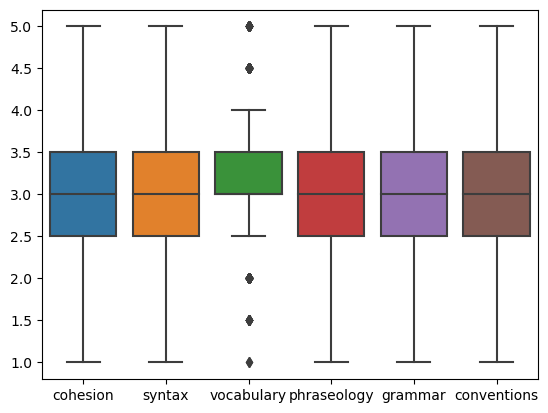

In [66]:
sns.boxplot(data=train)

c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

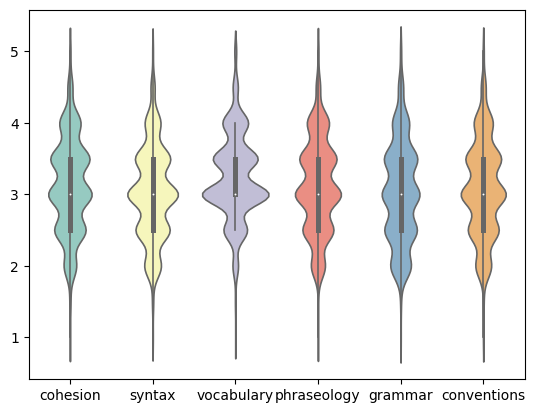

In [67]:
sns.violinplot(data=train, palette="Set3", bw=.25,  linewidth=1.2)

In [68]:
lang_cat = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
train[lang_cat].apply(pd.value_counts)

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
1.0,10,11,2,10,8,15
1.5,27,29,14,11,20,20
2.0,315,410,124,350,544,402
2.5,790,839,528,772,855,784
3.0,1096,1250,1503,1153,994,1151
3.5,988,867,1007,929,880,908
4.0,534,388,577,553,447,484
4.5,125,100,115,108,134,122
5.0,26,17,41,25,29,25


C:\Users\lemke\AppData\Local\Temp\ipykernel_20768\2747679961.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<AxesSubplot: >

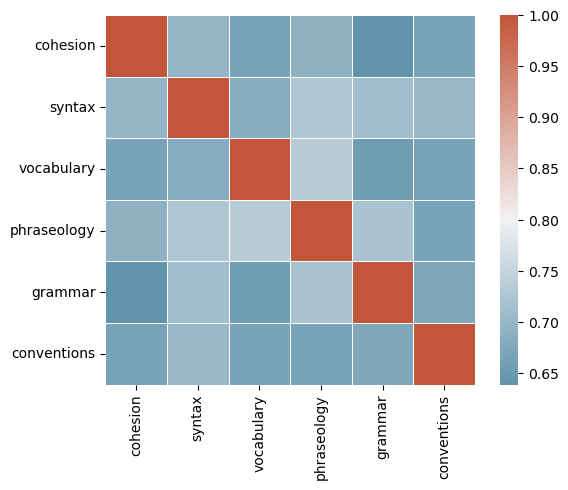

In [69]:
corr = train.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, square=True, linewidths=.5, center=0.8)

C:\Users\lemke\AppData\Local\Temp\ipykernel_20768\3786953262.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(train.corr(),  center=.8,


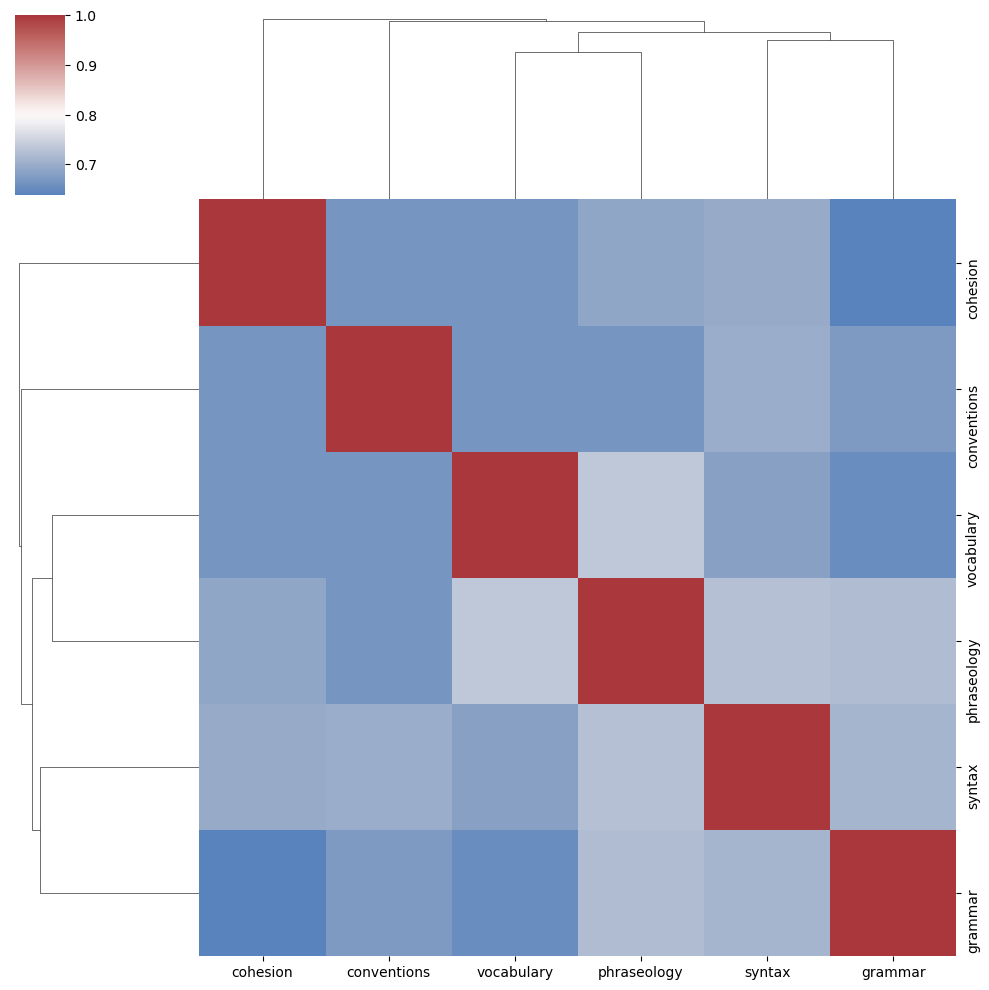

In [70]:
sns.clustermap(train.corr(),  center=.8,
                    cmap="vlag",
                    dendrogram_ratio=(.2, .2))

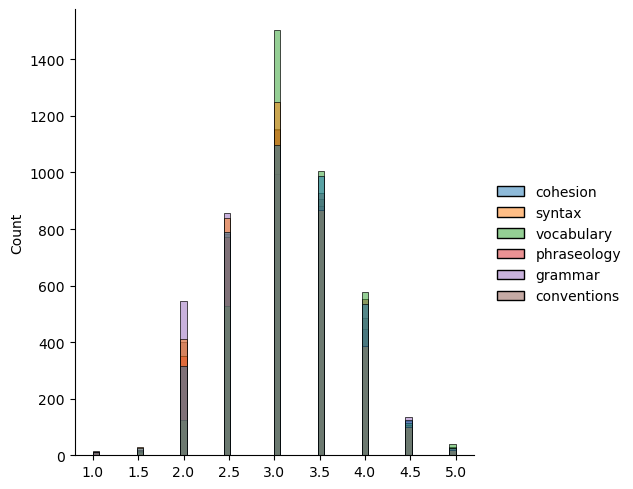

In [71]:
sns.displot(train[lang_cat])

## 📃 Text Data Analysis
Lets take a look into the main essay text structure. This means we will look into the text length, the wordcount and the corpus themself

<AxesSubplot: >

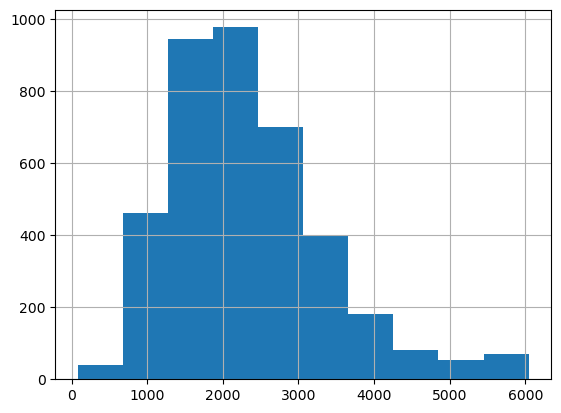

In [72]:
## text length comparison 
train['full_text'].str.len().hist()

<AxesSubplot: >

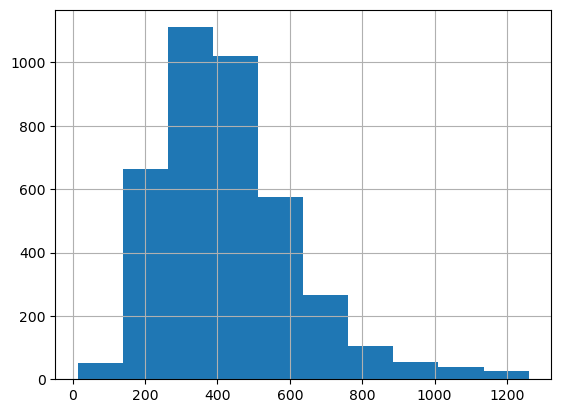

In [73]:
# Word count per essay
train['full_text'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot: >

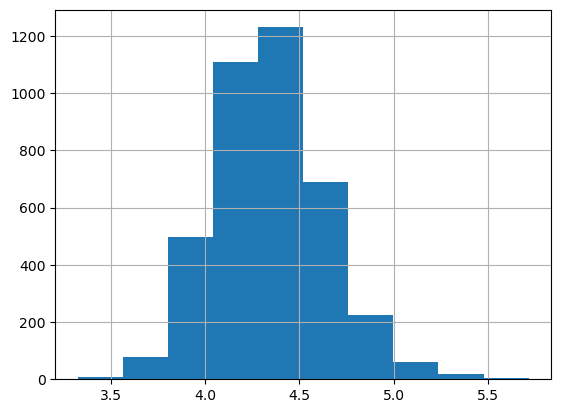

In [74]:
# Average word length
train['full_text'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

## 📖 Corpus Analysis

In [75]:
import nltk
nltk.download('stopwords')

stopwords = set(nltk.corpus.stopwords.words('english')) ## is unordered, cannot be changed and does not allowe duplicates.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lemke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 🛑 Stopwords
In this chapter I want to look into the stopword frequence in the essays. Stops words are a set of commonly used words in any sentece which are insignificant for textanalysis and be therefore exclude from the main prediction process. For example stop words are "the", "a", "an" etc.

I will use the found stop words to exclude them from the main analysis. Common NLP models especially the tokenizers are familiar with the process and do that will processing them, but in an exploratory data analysis you need to do that by your self.

In [76]:
corpus = []
full_text = train['full_text'].str.split()
full_text = full_text.values.tolist()

corpus = [word for i in full_text for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus: 
    if word in stopwords:
        dic[word] += 1

<BarContainer object of 10 artists>

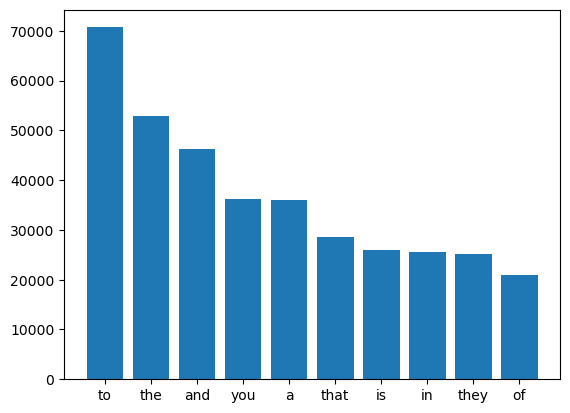

In [77]:
top = sorted(dic.items(), key=lambda x: x[1], reverse = True)[:10]
x, y = list(zip(*top))
plt.bar(x,y)

### 🆕 Most Frequent Words (w/o Stopwords)

<AxesSubplot: >

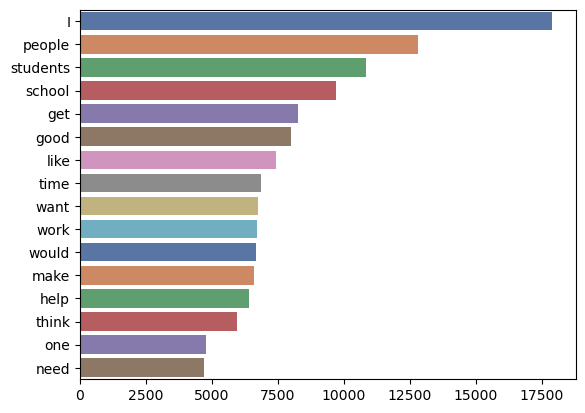

In [78]:
from typing import Counter


counter = Counter(corpus)
most = counter.most_common()

x, y = [], []
for word, count in most[:60]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)

sns.barplot(x = y, y = x, palette="deep")

### Ngrams
Ngrams are used to analyse the corpus for contiguous sequences of "n" words. The amount of contiguous words is defined by the "n", which is the reason for the name "Ngrams". Taking a look in to the most frequent n-grams in a corpus can give a better understanding about context in which the words where used.

If the topic is to search for two contiguous words its commonly called a <b>bigrams</b> if you search for three its a <b>trygrams</b>.

In [79]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer


list(ngrams(['I','went','to','the','river','bank'], 2))

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range =(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, index]) 
                    for word, index, in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:10]
    


In [80]:
top_n_bigrams = get_top_ngram(train['full_text'], 3)[:10]

<AxesSubplot: >

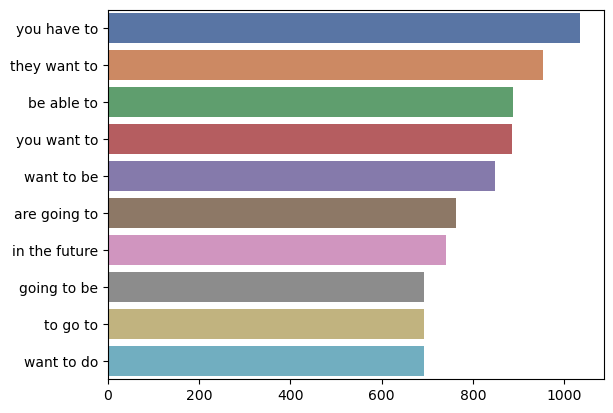

In [81]:
x, y = map(list, zip(*top_n_bigrams))
sns.barplot(x = y, y = x, palette="deep")

# 🕸 Model

In [82]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from transformers import AutoTokenizer
import torchvision
from torchvision import transforms, datasets

In [83]:
class ELLFeedbackConfig():
    model_name = 'bert-large-uncased'
    label_names = ['cohesion', 'syntax', 'vocabulary',
                   'phraseology', 'grammar', 'conventions']
    max_length = 512
    seed = 42
    batch_size = 128
    epochs = 4
    learning_rate = 8e-5


config = ELLFeedbackConfig

In [84]:
tokenizer =  AutoTokenizer.from_pretrained(config.model_name)

In [85]:
class CorpusDataset(Dataset):
    """Creates a dataset out of given text corpus with labels.

    Args:
        df (dataframe): ...
        tokenizer (callable): ...
        config (callable): A class with all the necessary params (label names, ...)
    """

    def __init__(self, df, tokenizer, config):
        self.df = df
        self.tokenizer = tokenizer 
        self.config = config
        self.labels = config.label_names
        self.max_length = config.max_length

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        corpus = self.df['full_text'][index]
        tokenized_corp = tokenizer.__call__(corpus,
                                               padding='max_length',
                                               truncation=True,
                                               max_length=self.max_length
                                               )
        
        inputs = {
            "input_ids": torch.tensor(tokenized_corp["input_ids"], dtype=torch.int32),
            "attention_mask": torch.tensor(tokenized_corp["attention_mask"], dtype=torch.int32),
            "token_type_ids": torch.tensor(tokenized_corp["token_type_ids"], dtype=torch.int32)
        }

        targets = {
            "labels": torch.tensor(self.df[self.labels].loc[index].to_list(), dtype=torch.float32)
        }

        return inputs, targets

In [86]:
train_dataset = CorpusDataset(train, tokenizer, config)
train_dataloader = DataLoader(train_dataset, 
                                batch_size=config.batch_size,
                                shuffle=True,
                                )

#seed=config.seed

In [87]:
from transformers import AutoModelForMaskedLM
from transformers import AutoModel

In [88]:
class ELLFeedback_Model(nn.Module):
    """Feedback model for ELL students based on the given labels
    Args:
        input-ids: ...
        xyzz:
        ...
    """
    def __init__(self, config):
        super(ELLFeedback_Model, self).__init__()
        self.config = config
        self.model = AutoModel.from_pretrained(self.config.model_name)
        self.fc_layer = nn.Sequential(
            nn.Linear(1024,512),
            nn.BatchNorm1d(512),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.Linear(256, 6)
        ) 

    def forward(self, inputs):
        _, outputs = self.model(**inputs, return_dict=False)
        last_hidden_state = outputs[0]
        x = self.fc_layer(last_hidden_state)
        return x




In [89]:
new_model = ELLFeedback_Model(config)
new_model

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


ELLFeedback_Model(
  (model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-12, eleme

In [90]:
from datasets import Dataset
ell_dataset = Dataset.from_pandas(train)

In [91]:
ell_dataset

Dataset({
    features: ['text_id', 'full_text', 'cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions'],
    num_rows: 3911
})

In [92]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(config.model_name)

In [93]:
def tok_fct(x):
    return tokenizer(x['full_text'],
                     padding='max_length',
                     truncation=True,
                     max_length=config.max_length)

In [94]:
tokenized_dataset = ell_dataset.map(tok_fct, batched=True)
tokenized_dataset = tokenized_dataset.rename_columns({'cohesion': 'cohesion_label',
                                                      'syntax': 'syntax_label',
                                                      'vocabulary': 'vocabulary_label',
                                                      'phraseology': 'phraseology_label',
                                                      'grammar': 'grammar_label',
                                                      'conventions': 'conventions_label'})

  0%|          | 0/4 [00:00<?, ?ba/s]

Now I am going to split the original dataset (which is called "train") into a training- and a validation-dataset. This is very important for the model finetuning process that takes place later. The validation set is the dataset where we are going to train a against. This means we wanna try to improve our model to get the best results on that set (... and keeping in mind not to overfit on the validation set 😆).

Unfortunately the used function creates a so called "test" dataset which is originally, in our understanding a "validation" set. I didn't find any ways of changeging the name of it (... its probably because of the set and their feature of being unchangeable 😂). However, this is the reason why we need to name our original test set (which is our final test set for pre-production test or just to assess our predictions on this competition) to "evaluation".

I my head the naming and meaning of the files follows a commnly the structure of train, val and test set where test is the untouched, before-production test set and not the other way around. I will keep that in mind and will probably find a way of turning this around. For now on, evaluation it the new test and test (inside the datadictionary is the validation set).

In [115]:
ell_datadictset = tokenized_dataset.train_test_split(0.25, seed=config.seed)
eval_dataset = Dataset.from_pandas(test).map(tok_fct, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [116]:
print(ell_datadictset)
print('---'*30)
print('---'*30)
print(eval_dataset)

DatasetDict({
    train: Dataset({
        features: ['text_id', 'full_text', 'cohesion_label', 'syntax_label', 'vocabulary_label', 'phraseology_label', 'grammar_label', 'conventions_label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2933
    })
    test: Dataset({
        features: ['text_id', 'full_text', 'cohesion_label', 'syntax_label', 'vocabulary_label', 'phraseology_label', 'grammar_label', 'conventions_label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 978
    })
})
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Dataset({
    features: ['text_id', 'full_text', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 3
})


In [119]:
from transformers import TrainingArguments,Trainer

# Definining training arguments for the Transformer
train_args = TrainingArguments('outputs',
                                learning_rate=config.learning_rate,
                                warmup_ratio=0.1,
                                lr_scheduler_type='cosine',
                                fp16=True,
                                evaluation_strategy="epoch",
                                per_device_train_batch_size=config.batch_size,
                                per_device_eval_batch_size=config.batch_size*2,
                                num_train_epochs=config.epochs,
                                weight_decay=0.01,
                                report_to='none'
)


In [120]:
model = AutoModel.from_pretrained(config.model_name)
trainer = Trainer(model, train_args,
                         train_dataset = ell_datadictset['train'],
                         eval_dataset = ell_datadictset['test'],
                         tokenizer=tokenizer)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Using cuda_amp half precision backend


In [121]:
trainer.train();

The following columns in the training set don't have a corresponding argument in `BertModel.forward` and have been ignored: phraseology_label, vocabulary_label, text_id, cohesion_label, full_text, syntax_label, conventions_label, grammar_label. If phraseology_label, vocabulary_label, text_id, cohesion_label, full_text, syntax_label, conventions_label, grammar_label are not expected by `BertModel.forward`,  you can safely ignore this message.
c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2933
  Num Epochs = 4
  Instantaneous batch size per device = 128
  Total train batch size (w. parallel, distributed & accumulation) = 256
  Gradient Accumulation steps = 1
  

  0%|          | 0/48 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


RuntimeError: Caught RuntimeError in replica 0 on device 0.
Original Traceback (most recent call last):
  File "c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\torch\nn\parallel\parallel_apply.py", line 61, in _worker
    output = module(*input, **kwargs)
  File "c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\torch\nn\modules\module.py", line 1130, in _call_impl
    return forward_call(*input, **kwargs)
  File "c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\transformers\models\bert\modeling_bert.py", line 1014, in forward
    encoder_outputs = self.encoder(
  File "c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\torch\nn\modules\module.py", line 1130, in _call_impl
    return forward_call(*input, **kwargs)
  File "c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\transformers\models\bert\modeling_bert.py", line 603, in forward
    layer_outputs = layer_module(
  File "c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\torch\nn\modules\module.py", line 1130, in _call_impl
    return forward_call(*input, **kwargs)
  File "c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\transformers\models\bert\modeling_bert.py", line 489, in forward
    self_attention_outputs = self.attention(
  File "c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\torch\nn\modules\module.py", line 1130, in _call_impl
    return forward_call(*input, **kwargs)
  File "c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\transformers\models\bert\modeling_bert.py", line 419, in forward
    self_outputs = self.self(
  File "c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\torch\nn\modules\module.py", line 1130, in _call_impl
    return forward_call(*input, **kwargs)
  File "c:\Users\lemke\anaconda3\envs\venv309_pytorch\lib\site-packages\transformers\models\bert\modeling_bert.py", line 357, in forward
    context_layer = torch.matmul(attention_probs, value_layer)
RuntimeError: CUDA out of memory. Tried to allocate 1024.00 MiB (GPU 0; 11.00 GiB total capacity; 9.32 GiB already allocated; 0 bytes free; 9.83 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF


In [117]:
# TO-DO: Implement the competition metric here
def corr_d(eval_pred):
    return {'pearson': corr(*eval_pred)}

In [ ]:
def fold_data():
    pass

#### 🏗 In Progress